In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Imports successful")


✅ Imports successful


Cellule 2 — Chargement des saisons

In [4]:
# Définir le chemin des données
DATA_DIR = Path('../data/raw')

# Lister les saisons disponibles
seasons = sorted([d.name for d in DATA_DIR.iterdir() if d.is_dir()])
print(f"📅 Saisons disponibles: {len(seasons)}")
for season in seasons:
    print(f"  - {season}")


📅 Saisons disponibles: 8
  - 2015-2016
  - 2016-2017
  - 2017-2018
  - 2018-2019
  - 2019-2020
  - 2020-2021
  - 2021-2022
  - 2022-2023


Cellule 3 — Fonction load_season_data

In [5]:
def load_season_data(season):
    """Charge toutes les données d'une saison"""
    season_dir = DATA_DIR / season
    
    data = {}
    
    # Charger les résultats
    results_path = season_dir / 'results.csv'
    if results_path.exists():
        data['results'] = pd.read_csv(results_path)
        data['results']['season'] = season
    
    # Charger les standings
    standings_path = season_dir / 'standings.csv'
    if standings_path.exists():
        data['standings'] = pd.read_csv(standings_path)
    
    # Charger les stats
    stats_path = season_dir / 'match_stats.csv'
    if stats_path.exists():
        data['stats'] = pd.read_csv(stats_path)
        data['stats']['season'] = season
    
    return data

# Charger une saison exemple
example_season = '2022-2023'
example_data = load_season_data(example_season)

print(f"\n📦 Données chargées pour {example_season}:")
for key, df in example_data.items():
    print(f"  - {key}: {len(df)} rows, {len(df.columns)} columns")



📦 Données chargées pour 2022-2023:
  - results: 380 rows, 9 columns
  - standings: 760 rows, 12 columns
  - stats: 380 rows, 482 columns


Cellule 4 — Structure des résultats

In [6]:
results = example_data['results']

print("📋 Structure des résultats:")
print(f"Shape: {results.shape}")
print(f"\nColonnes: {results.columns.tolist()}")
print(f"\nTypes de données:")
print(results.dtypes)
print(f"\nValeurs manquantes:")
print(results.isnull().sum())

print("\n🔍 Aperçu des données:")
results.head()


📋 Structure des résultats:
Shape: (380, 9)

Colonnes: ['match_id', 'gameweek', 'kickoff', 'home_team', 'away_team', 'home_goals', 'away_goals', 'result', 'season']

Types de données:
match_id      float64
gameweek      float64
kickoff        object
home_team      object
away_team      object
home_goals    float64
away_goals    float64
result         object
season         object
dtype: object

Valeurs manquantes:
match_id      0
gameweek      0
kickoff       0
home_team     0
away_team     0
home_goals    0
away_goals    0
result        0
season        0
dtype: int64

🔍 Aperçu des données:


,match_id,gameweek,kickoff,home_team,away_team,home_goals,away_goals,result,season
0,74911.0,1.0,"Fri 5 Aug 2022, 20:00 BST",Crystal Palace,Arsenal,0.0,2.0,A,2022-2023
1,74914.0,1.0,"Sat 6 Aug 2022, 12:30 BST",Fulham,Liverpool,2.0,2.0,D,2022-2023
2,74912.0,1.0,"Sat 6 Aug 2022, 15:00 BST",Bournemouth,Aston Villa,2.0,0.0,H,2022-2023
3,74915.0,1.0,"Sat 6 Aug 2022, 15:00 BST",Leeds United,Wolverhampton Wanderers,2.0,1.0,H,2022-2023
4,74917.0,1.0,"Sat 6 Aug 2022, 15:00 BST",Newcastle United,Nottingham Forest,2.0,0.0,H,2022-2023


Cellule 5 — Statistiques descriptives

In [7]:
# Statistiques descriptives
print("📊 Statistiques sur les buts:")
print(results[['home_goals', 'away_goals']].describe())

# Distribution des résultats
print("\n🏆 Distribution des résultats:")
print(results['result'].value_counts())


📊 Statistiques sur les buts:
       home_goals  away_goals
count  380.000000  380.000000
mean     1.634211    1.218421
std      1.419944    1.183518
min      0.000000    0.000000
25%      1.000000    0.000000
50%      1.000000    1.000000
75%      2.000000    2.000000
max      9.000000    6.000000

🏆 Distribution des résultats:
result
H    184
A    109
D     87
Name: count, dtype: int64


Cellule 6 — Structure standings

In [8]:
standings = example_data['standings']

print("📋 Structure des standings:")
print(f"Shape: {standings.shape}")
print(f"\nColonnes: {standings.columns.tolist()}")

# Classement final (gameweek 38)
final_standings = standings[standings['gameweek'] == 38].sort_values('position')
print("\n🏆 Classement final de la saison:")
print(final_standings[['position', 'team', 'played', 'won', 'drawn', 'lost', 'points']].head(10))


📋 Structure des standings:
Shape: (760, 12)

Colonnes: ['team', 'season', 'gameweek', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points', 'position']

🏆 Classement final de la saison:
     position                    team  played  won  drawn  lost  points
740         1         Manchester City      38   28      5     5      89
741         2                 Arsenal      38   26      6     6      84
742         3       Manchester United      38   23      6     9      75
743         4        Newcastle United      38   19     14     5      71
744         5               Liverpool      38   19     10     9      67
745         6  Brighton & Hove Albion      38   18      8    12      62
746         7             Aston Villa      38   18      7    13      61
747         8       Tottenham Hotspur      38   18      6    14      60
748         9               Brentford      38   15     14     9      59
749        10                  Fulham      38   15     

Cellule 7 — Structure stats

In [9]:
if 'stats' in example_data:
    stats = example_data['stats']
    
    print("📋 Structure des statistiques:")
    print(f"Shape: {stats.shape}")
    print(f"\nNombre de colonnes: {len(stats.columns)}")
    
    # Identifier les statistiques disponibles
    stat_columns = [col for col in stats.columns if col.startswith('home_') or col.startswith('away_')]
    stat_names = set([col.replace('home_', '').replace('away_', '') for col in stat_columns])
    
    print(f"\n📊 Statistiques disponibles ({len(stat_names)}):")
    for i, stat in enumerate(sorted(stat_names), 1):
        print(f"  {i:2d}. {stat}")
    
    print("\n🔍 Aperçu:")
    display(stats.head())
else:
    print("⚠️ Pas de statistiques disponibles pour cette saison")


📋 Structure des statistiques:
Shape: (380, 482)

Nombre de colonnes: 482

📊 Statistiques disponibles (240):
   1. accurate_back_zone_pass
   2. accurate_chipped_pass
   3. accurate_corners_intobox
   4. accurate_cross
   5. accurate_cross_nocorner
   6. accurate_flick_on
   7. accurate_freekick_cross
   8. accurate_fwd_zone_pass
   9. accurate_goal_kicks
  10. accurate_keeper_sweeper
  11. accurate_keeper_throws
  12. accurate_launches
  13. accurate_layoffs
  14. accurate_long_balls
  15. accurate_pass
  16. accurate_pull_back
  17. accurate_through_ball
  18. accurate_throws
  19. aerial_lost
  20. aerial_won
  21. att_assist_openplay
  22. att_assist_setplay
  23. att_bx_centre
  24. att_bx_left
  25. att_bx_right
  26. att_cmiss_high
  27. att_cmiss_high_left
  28. att_cmiss_high_right
  29. att_cmiss_left
  30. att_cmiss_right
  31. att_corner
  32. att_fastbreak
  33. att_freekick_goal
  34. att_freekick_miss
  35. att_freekick_post
  36. att_freekick_target
  37. att_freekick_to

,match_id,home_team,away_team,home_formation_used,home_total_back_zone_pass,home_leftside_pass,home_touches,home_total_pass,home_possession_percentage,home_open_play_pass,...,away_att_obxd_right,away_att_lg_right,away_foul_throw_in,away_att_pen_post,home_att_obxd_right,away_att_pen_miss,away_att_lg_left,home_att_lg_right,home_att_pen_post,season
0,74911,Crystal Palace,Arsenal,4231.0,308.0,155.0,770.0,562.0,56.3,543.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-2023
1,74914,Fulham,Liverpool,4231.0,95.0,50.0,499.0,294.0,33.1,265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-2023
2,74912,Bournemouth,Aston Villa,3421.0,181.0,63.0,501.0,301.0,34.4,267.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-2023
3,74915,Leeds United,Wolverhampton Wanderers,4231.0,157.0,82.0,551.0,355.0,40.1,336.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-2023
4,74917,Newcastle United,Nottingham Forest,433.0,160.0,133.0,675.0,469.0,61.4,453.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-2023


Cellule 8 — Distribution des buts

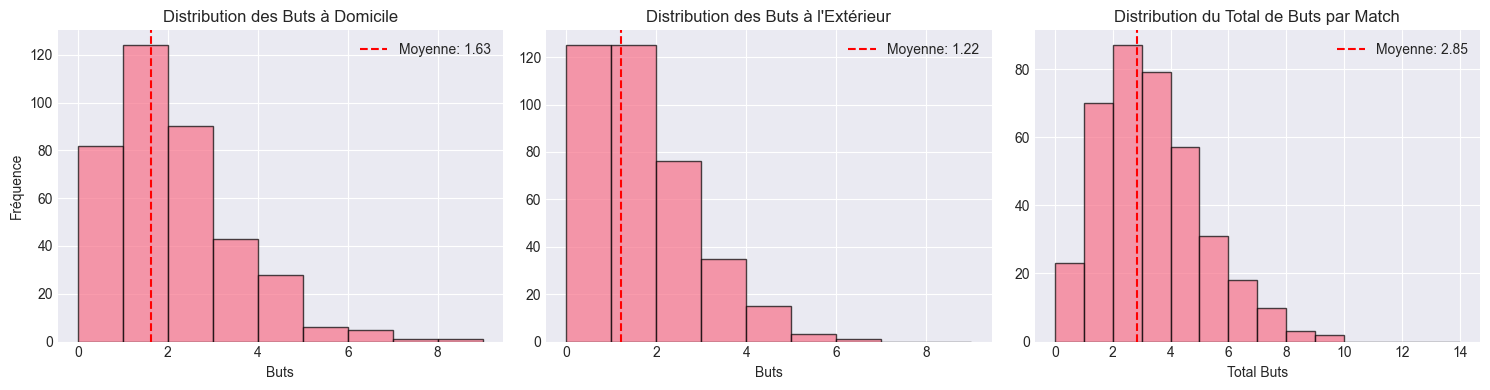


📊 Statistiques:
  Buts moyens à domicile: 1.63
  Buts moyens à l'extérieur: 1.22
  Total buts moyen par match: 2.85


In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Distribution des buts à domicile
axes[0].hist(results['home_goals'], bins=range(0, 10), edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution des Buts à Domicile')
axes[0].set_xlabel('Buts')
axes[0].set_ylabel('Fréquence')
axes[0].axvline(results['home_goals'].mean(), color='red', linestyle='--', label=f'Moyenne: {results["home_goals"].mean():.2f}')
axes[0].legend()

# Distribution des buts à l'extérieur
axes[1].hist(results['away_goals'], bins=range(0, 10), edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution des Buts à l\'Extérieur')
axes[1].set_xlabel('Buts')
axes[1].axvline(results['away_goals'].mean(), color='red', linestyle='--', label=f'Moyenne: {results["away_goals"].mean():.2f}')
axes[1].legend()

# Total de buts par match
total_goals = results['home_goals'] + results['away_goals']
axes[2].hist(total_goals, bins=range(0, 15), edgecolor='black', alpha=0.7)
axes[2].set_title('Distribution du Total de Buts par Match')
axes[2].set_xlabel('Total Buts')
axes[2].axvline(total_goals.mean(), color='red', linestyle='--', label=f'Moyenne: {total_goals.mean():.2f}')
axes[2].legend()

plt.tight_layout()
plt.show()

print(f"\n📊 Statistiques:")
print(f"  Buts moyens à domicile: {results['home_goals'].mean():.2f}")
print(f"  Buts moyens à l'extérieur: {results['away_goals'].mean():.2f}")
print(f"  Total buts moyen par match: {total_goals.mean():.2f}")


Cellule 9 — Avantage domicile

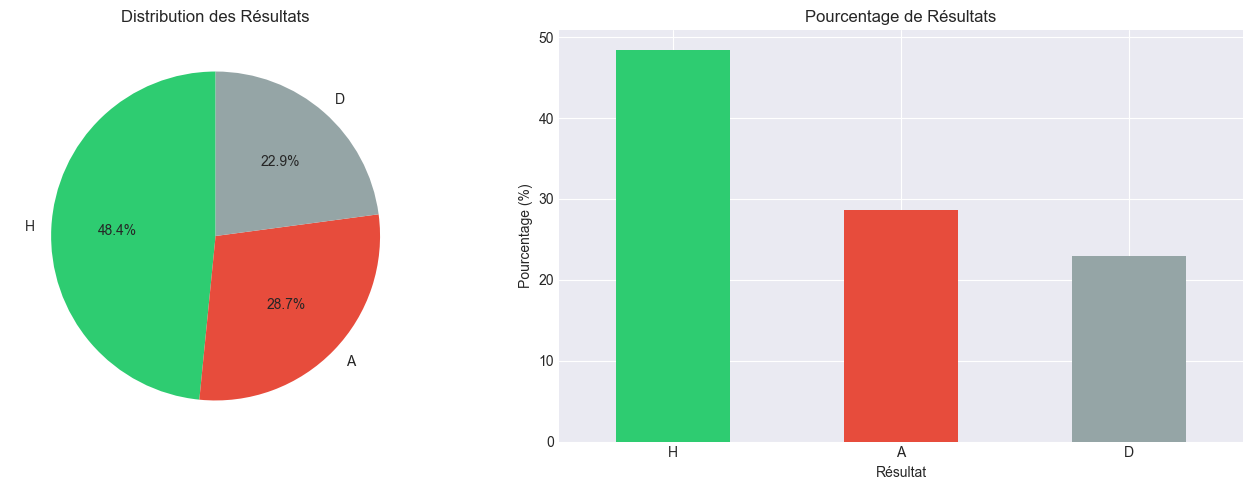


🏠 Analyse de l'avantage du domicile:
  H: 48.42%
  A: 28.68%
  D: 22.89%


In [11]:
# Calculer les pourcentages de résultats
result_counts = results['result'].value_counts()
result_pcts = (result_counts / len(results) * 100).round(2)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#2ecc71', '#e74c3c', '#95a5a6']
axes[0].pie(result_pcts, labels=result_pcts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Distribution des Résultats')

# Bar chart
result_pcts.plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('Pourcentage de Résultats')
axes[1].set_xlabel('Résultat')
axes[1].set_ylabel('Pourcentage (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print(f"\n🏠 Analyse de l'avantage du domicile:")
for result, pct in result_pcts.items():
    print(f"  {result}: {pct}%")


Cellule 10 — Évolution des points

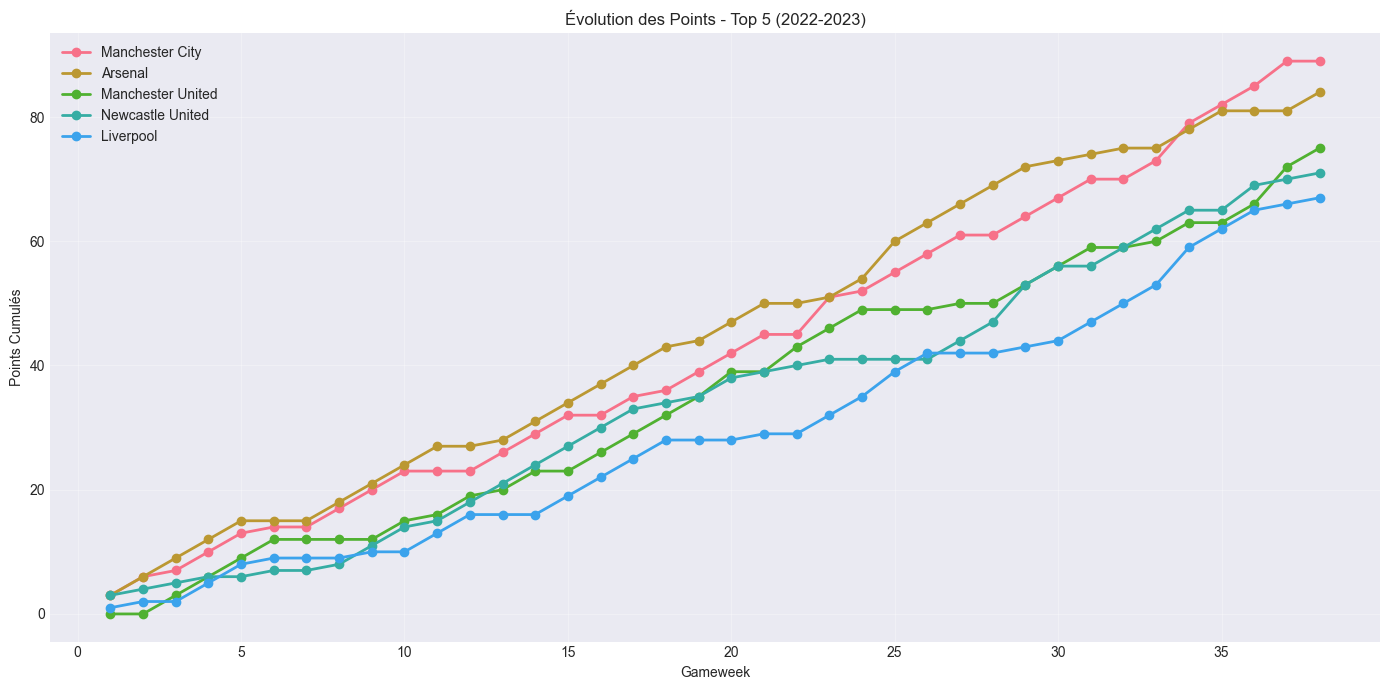

In [12]:
# Sélectionner quelques équipes intéressantes
final_top5 = final_standings.head(5)['team'].values

plt.figure(figsize=(14, 7))

for team in final_top5:
    team_data = standings[standings['team'] == team].sort_values('gameweek')
    plt.plot(team_data['gameweek'], team_data['points'], marker='o', label=team, linewidth=2)

plt.xlabel('Gameweek')
plt.ylabel('Points Cumulés')
plt.title(f'Évolution des Points - Top 5 ({example_season})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Cellule 11 — Corrélations

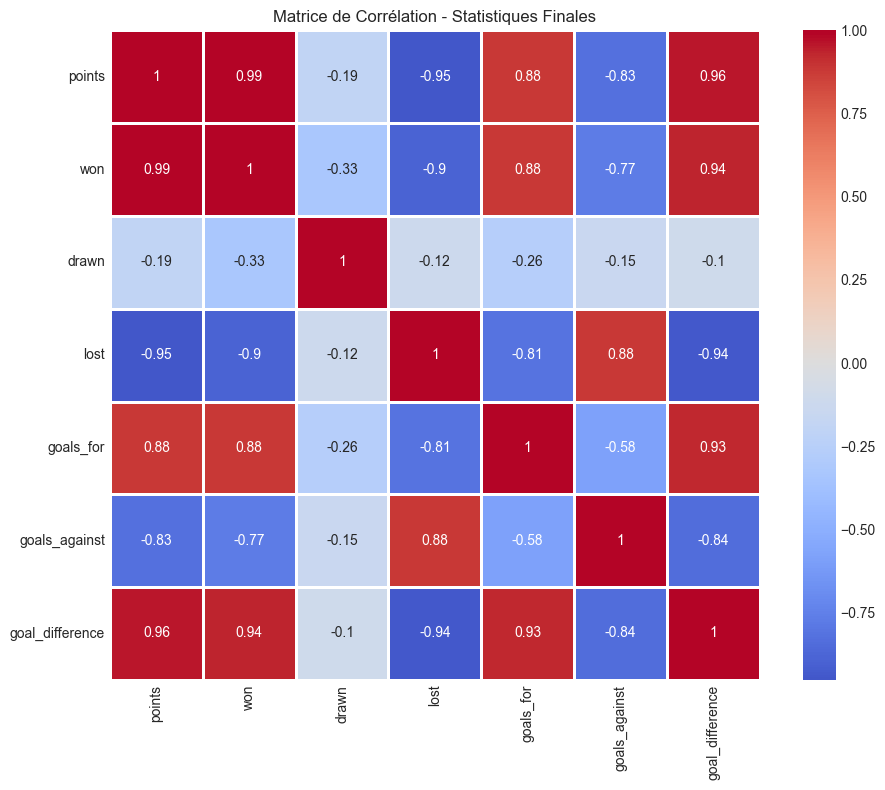


🔗 Corrélations les plus fortes avec les Points:
  won: 0.989
  goal_difference: 0.961
  goals_for: 0.879
  drawn: -0.192
  goals_against: -0.827
  lost: -0.952


In [13]:
# Créer un dataset avec les statistiques finales de chaque équipe
final_stats = standings[standings['gameweek'] == 38].copy()

# Sélectionner les colonnes numériques pour la corrélation
numeric_cols = ['points', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference']
correlation_matrix = final_stats[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Matrice de Corrélation - Statistiques Finales')
plt.tight_layout()
plt.show()

print("\n🔗 Corrélations les plus fortes avec les Points:")
points_corr = correlation_matrix['points'].drop('points').sort_values(ascending=False)
for stat, corr in points_corr.items():
    print(f"  {stat}: {corr:.3f}")


Cellule 12 — Chargement multi-saisons

In [14]:
# Charger toutes les saisons disponibles
all_results = []
all_standings = []

for season in seasons:
    data = load_season_data(season)
    if 'results' in data:
        all_results.append(data['results'])
    if 'standings' in data:
        all_standings.append(data['standings'])

# Combiner toutes les données
df_all_results = pd.concat(all_results, ignore_index=True)
df_all_standings = pd.concat(all_standings, ignore_index=True)

print(f"📊 Données consolidées:")
print(f"  Total matchs: {len(df_all_results)}")
print(f"  Total standings records: {len(df_all_standings)}")
print(f"  Saisons: {df_all_results['season'].nunique()}")


📊 Données consolidées:
  Total matchs: 3040
  Total standings records: 6076
  Saisons: 8


Cellule 13 — Tendances globales

<Figure size 1400x600 with 0 Axes>

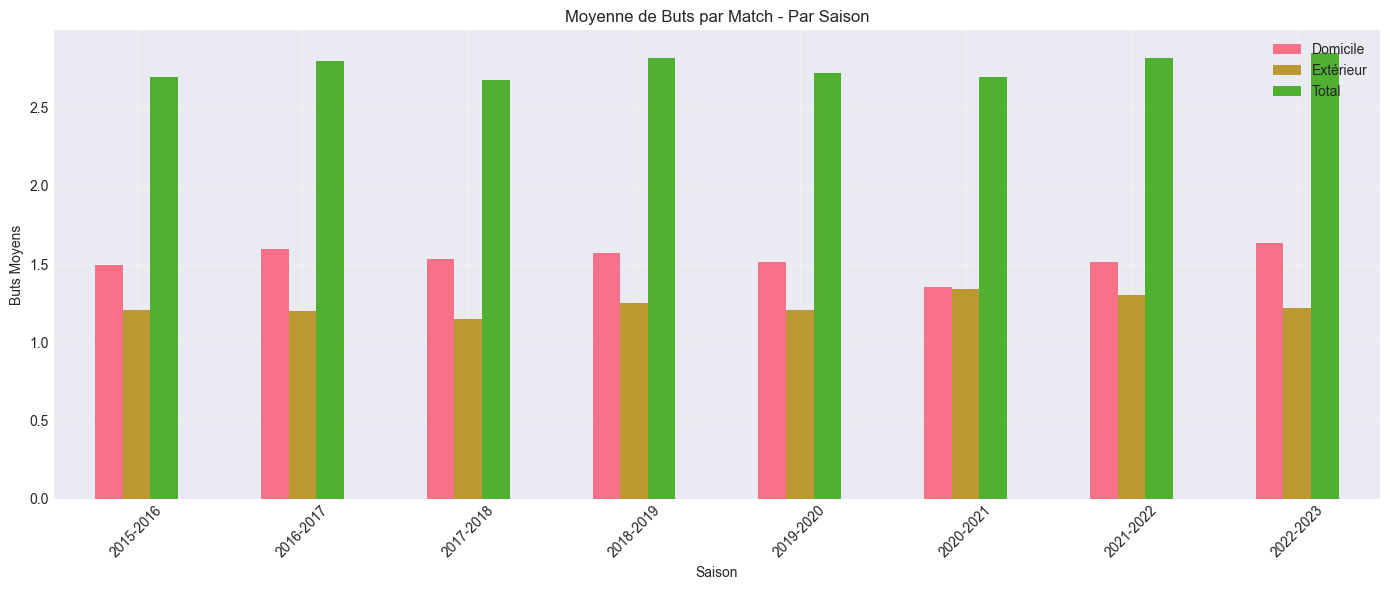


📈 Tendance des buts:
           home_goals  away_goals  total_goals
season                                        
2015-2016    1.492105    1.207895     2.700000
2016-2017    1.597368    1.202632     2.800000
2017-2018    1.531579    1.147368     2.678947
2018-2019    1.568421    1.252632     2.821053
2019-2020    1.515789    1.205263     2.721053
2020-2021    1.352632    1.342105     2.694737
2021-2022    1.513158    1.305263     2.818421
2022-2023    1.634211    1.218421     2.852632


In [15]:
# Moyenne de buts par saison
goals_by_season = df_all_results.groupby('season').agg({
    'home_goals': 'mean',
    'away_goals': 'mean'
})
goals_by_season['total_goals'] = goals_by_season['home_goals'] + goals_by_season['away_goals']

plt.figure(figsize=(14, 6))
goals_by_season[['home_goals', 'away_goals', 'total_goals']].plot(kind='bar', figsize=(14, 6))
plt.title('Moyenne de Buts par Match - Par Saison')
plt.xlabel('Saison')
plt.ylabel('Buts Moyens')
plt.legend(['Domicile', 'Extérieur', 'Total'])
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📈 Tendance des buts:")
print(goals_by_season)


Cellule 14 — Points par position

🎯 Points moyens par position clé:
            mean   min    max
position                     
1         92.375  81.0  100.0
4         70.375  66.0   76.0
17        37.375  35.0   40.0
18        33.625  28.0   37.0
20        22.375  16.0   31.0


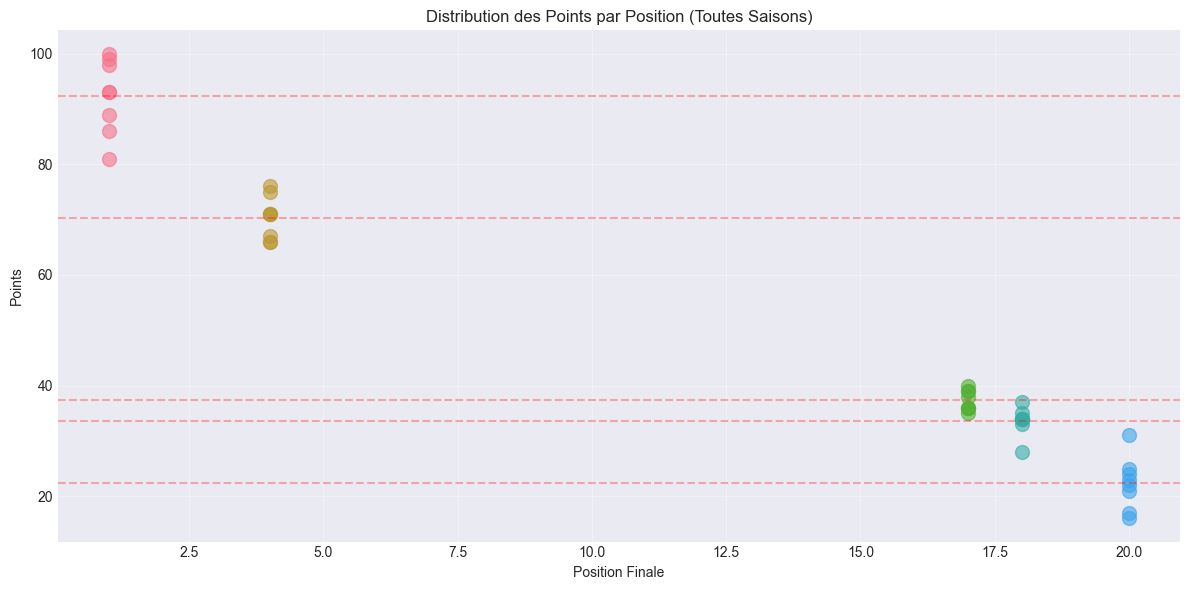

In [16]:
# Points finaux par position
final_all = df_all_standings[df_all_standings['gameweek'] == 38]

positions_of_interest = [1, 4, 17, 18, 20]  # Champion, Top 4, Relégation
position_stats = final_all[final_all['position'].isin(positions_of_interest)].groupby('position')['points'].describe()

print("🎯 Points moyens par position clé:")
print(position_stats[['mean', 'min', 'max']])

# Visualisation
plt.figure(figsize=(12, 6))
for pos in positions_of_interest:
    pos_data = final_all[final_all['position'] == pos]['points']
    plt.scatter([pos]*len(pos_data), pos_data, alpha=0.6, s=100)
    plt.axhline(pos_data.mean(), color='red', linestyle='--', alpha=0.3)

plt.xlabel('Position Finale')
plt.ylabel('Points')
plt.title('Distribution des Points par Position (Toutes Saisons)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Cellule 15 — Insights Feature Engineering

In [17]:
print("💡 INSIGHTS POUR LE FEATURE ENGINEERING:")

print("\n1. Features basées sur la FORME RÉCENTE:")
print("   - Points des 5 derniers matchs")
print("   - Buts marqués/encaissés récemment")
print("   - Win streak / Losing streak")

print("\n2. Features CUMULATIVES (depuis le début de saison):")
print("   - Points actuels")
print("   - Position actuelle")
print("   - Différence de buts cumulée")
print("   - Pourcentage de victoires")

print("\n3. Features de DIFFICULTÉ:")
print("   - Strength of Schedule (matchs restants)")
print("   - Nombre de matchs à domicile vs extérieur restants")
print("   - Historique contre les adversaires restants")

print("\n4. Features HISTORIQUES:")
print("   - Performance moyenne des 3 dernières saisons")
print("   - Tendance (équipe en progression/régression)")
print("   - Budget/valeur d'équipe (si disponible)")

print("\n5. Features de CONTEXTE:")
print("   - Gameweek actuel")
print("   - Matchs joués / Matchs restants")
print("   - Points par match actuels")


💡 INSIGHTS POUR LE FEATURE ENGINEERING:

1. Features basées sur la FORME RÉCENTE:
   - Points des 5 derniers matchs
   - Buts marqués/encaissés récemment
   - Win streak / Losing streak

2. Features CUMULATIVES (depuis le début de saison):
   - Points actuels
   - Position actuelle
   - Différence de buts cumulée
   - Pourcentage de victoires

3. Features de DIFFICULTÉ:
   - Strength of Schedule (matchs restants)
   - Nombre de matchs à domicile vs extérieur restants
   - Historique contre les adversaires restants

4. Features HISTORIQUES:
   - Performance moyenne des 3 dernières saisons
   - Tendance (équipe en progression/régression)
   - Budget/valeur d'équipe (si disponible)

5. Features de CONTEXTE:
   - Gameweek actuel
   - Matchs joués / Matchs restants
   - Points par match actuels


Cellule 16 — Exemple calcul features

In [19]:
# Exemple: Calculer la forme des 5 derniers matchs pour une équipe
def calculate_recent_form(team, season, gameweek, results_df, window=5):
    """Calcule les points des N derniers matchs"""
    # Filtrer les matchs de cette équipe jusqu'à ce gameweek
    team_matches = results_df[
        (results_df['season'] == season) &
        (results_df['gameweek'] < gameweek) &
        ((results_df['home_team'] == team) | (results_df['away_team'] == team))
    ].sort_values('gameweek').tail(window)
    
    # Calculer les points
    points = 0
    for _, match in team_matches.iterrows():
        if match['home_team'] == team:
            if match['home_goals'] > match['away_goals']:
                points += 3
            elif match['home_goals'] == match['away_goals']:
                points += 1
        else:
            if match['away_goals'] > match['home_goals']:
                points += 3
            elif match['away_goals'] == match['home_goals']:
                points += 1
    
    return points

# Test sur quelques équipes
test_team = final_top5[0]
test_gameweeks = [10, 20, 30, 38]

print(f"📊 Forme de {test_team} au cours de {example_season}:")
for gw in test_gameweeks:
    form = calculate_recent_form(test_team, example_season, gw, results, window=5)
    print(f"  Gameweek {gw:2d}: {form}/15 points (derniers 5 matchs)")


📊 Forme de Manchester City au cours de 2022-2023:
  Gameweek 10: 13/15 points (derniers 5 matchs)
  Gameweek 20: 10/15 points (derniers 5 matchs)
  Gameweek 30: 13/15 points (derniers 5 matchs)
  Gameweek 38: 13/15 points (derniers 5 matchs)
